Download database file.

In [1]:
import os
import wget
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Download database file.

In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite'
filename = 'm4_survey_data.sqlite'

if not os.path.exists(filename):
    wget.download(url, filename)
else:
    print(f"'{filename}' zaten mevcut. Tekrar indirme işlemi yapılmayacak.")


'm4_survey_data.sqlite' zaten mevcut. Tekrar indirme işlemi yapılmayacak.


Connect to the database.

In [3]:
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Get the table names.

In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


How to list all tables in the database.

In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


How to run a group by query

In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


How to describe a table

In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

Plot a histogram of `ConvertedComp.`

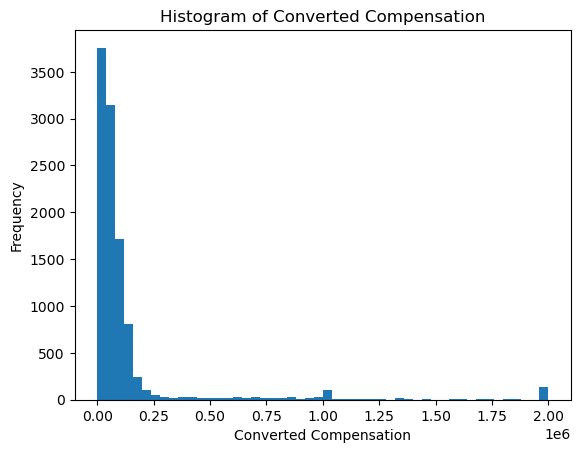

In [8]:
QUERY = """
SELECT ConvertedComp
FROM master
"""

df = pd.read_sql_query(QUERY,conn)

plt.hist(df['ConvertedComp'], bins=50)
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Compensation')
plt.show()

Plot a box plot of `Age.`

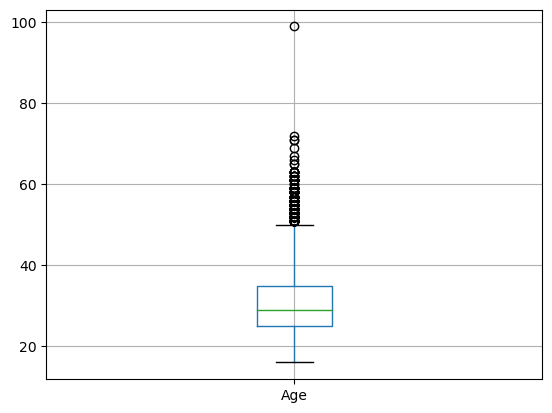

In [9]:
QUERY = """
SELECT Age
FROM master
"""

df = pd.read_sql_query(QUERY,conn)

df.boxplot(column=['Age'])
plt.show()

Visualizing relationships in data


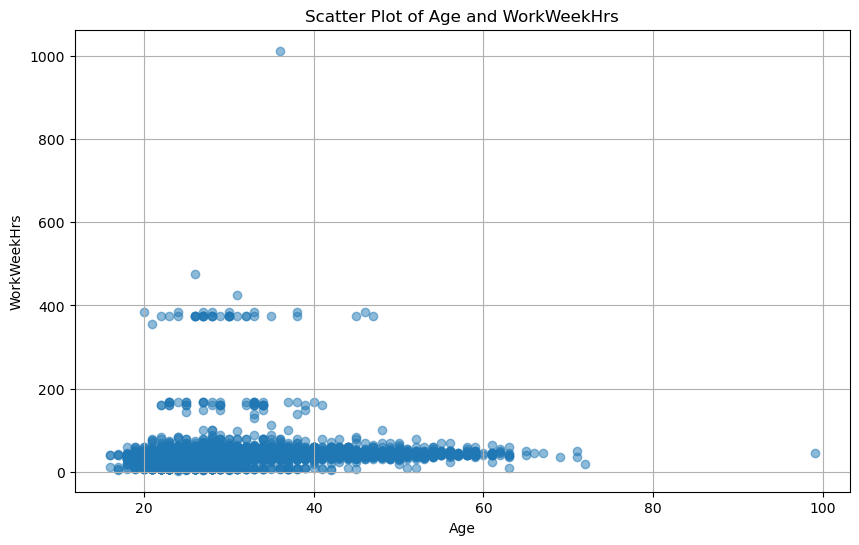

In [10]:

QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""

df = pd.read_sql_query(QUERY,conn)

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

plt.scatter(df['Age'], df['WorkWeekHrs'], alpha=0.5)  # 'alpha' controls the transparency of the points

plt.title('Scatter Plot of Age and WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.grid(True)

plt.show()

Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.

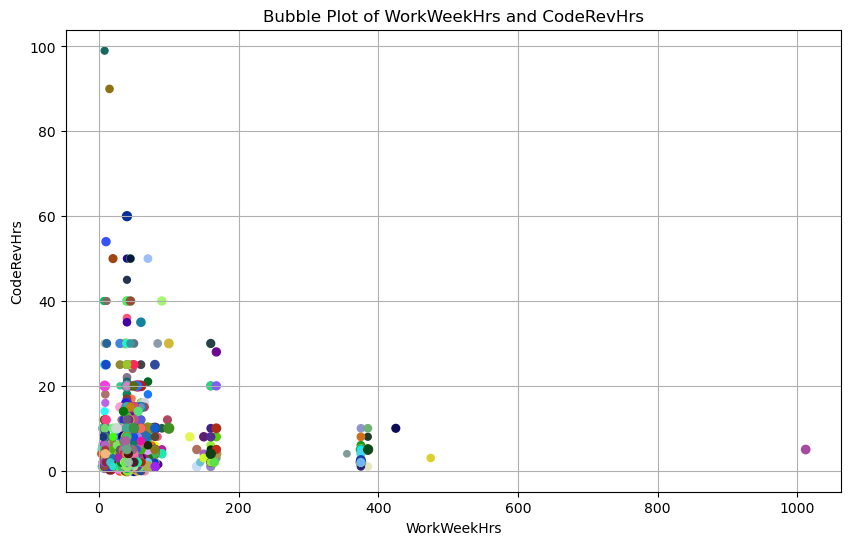

In [11]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""

df = pd.read_sql_query(QUERY,conn)

age = df['Age']
work_week_hrs = df['WorkWeekHrs']
code_rev_hrs = df['CodeRevHrs']

# Veri noktaları için rastgele renkler oluşturun
np.random.seed(0)  # Rastgelelik için sabit bir tohum kullanın
colors = np.random.rand(len(age), 3)  # Her bir veri noktası için rastgele RGB renkleri

plt.figure(figsize=(10, 6))

# Her noktanın rengini belirlemek için 'c' parametresini kullanın
plt.scatter(work_week_hrs, code_rev_hrs, s=age, c=colors)

plt.title('Bubble Plot of WorkWeekHrs and CodeRevHrs')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.grid(True)

plt.show()

Visualizing composition of data

Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


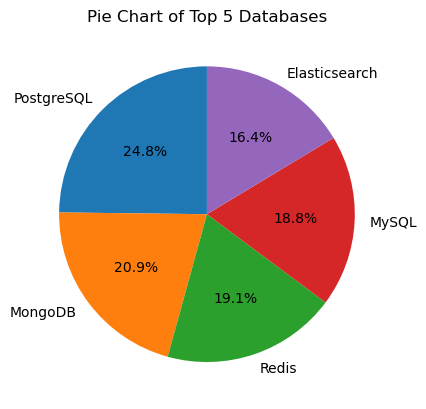

In [15]:
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) as count
FROM DatabaseDesireNextYear
WHERE DatabaseDesireNextYear IS NOT NULL
GROUP BY DatabaseDesireNextYear
ORDER BY count DESC
LIMIT 5
"""

df = pd.read_sql_query(QUERY,conn)

labels = df['DatabaseDesireNextYear']
sizes = df['count']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Top 5 Databases')
plt.show()